### Exercise 10.1

In [34]:
import numpy as np
import sys
from matplotlib import pyplot as plt
sys.path.append('../python_scripts')
from GMesh2d import MESH2D
from GHeatConservationSolver import EXPLICIT_SOLVER

#### Initiate a 2d mesh

This MESH2D class is defined in "python_scripts/GMesh2d.py". 
Here, we use a regular grid of 51 × 31 points. The model size is 1000 × 1500 km2 (i.e. 1 000 000 × 1 500 000 m2). 

In [35]:
# initiate mesh
xsize = 1000000.0 # Model size, m
ysize = 1500000.0
xnum = 11   # Number of nodes
ynum = 16
xs = np.linspace(0.0, xsize, xnum) # construct xs 
ys = np.linspace(0.0, ysize, ynum) # construct ys
Mesh2d = MESH2D(xs, ys)

#### Read in the initial temperature

The initial setup corresponds to a background temperature of 1000 K with a rectangular thermal wave (1300 K) in the middle (‘wave’ means sharp perturbation of the temperature field).

(16, 11)


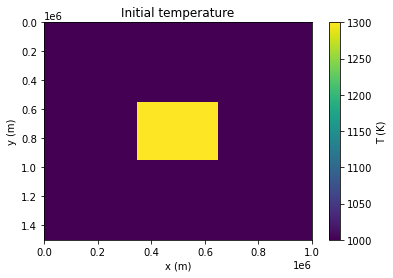

In [36]:
# initial temperature
def rectangular_wave_temperature(x, y, xsize, ysize):
    '''
    temperature profile of a retangular wave in the middle
    '''
    dx = xsize / 3.0
    dy = ysize / 3.0
    if type(x) == float and type(y) == float:
      assert(x >= 0 and x <= xsize and y >= 0 and y <= ysize)
      if x > (xsize - dx) / 2.0 and x < (xsize + dx) / 2.0\
        and y > (ysize - dy) / 2.0 and y < (ysize + dy) / 2.0:
        T = 1300.0
      else:
        T = 1000.0
    elif type(x) == np.ndarray and type(y) == np.ndarray:
      assert(x.shape == y.shape)
      mask = (x > (xsize - dx) / 2.0) & (x < (xsize + dx) / 2.0)\
        & (y > (ysize - dy) / 2.0) & (y < (ysize + dy) / 2.0)
      T = np.ones(x.shape) * 1000.0
      T[mask] = 1300.0
    else:
      raise TypeError("Type of x or y is wrong (either float or numpy.ndarray")
    return T

xxs, yys = np.meshgrid(xs, ys)
Ts_init = rectangular_wave_temperature(xxs, yys, xsize, ysize)
print(Ts_init.shape)  # debug

# plot
fig, ax = plt.subplots()
h = ax.pcolor(xxs, yys, Ts_init)
ax.set_title('Initial temperature')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_xlim([0.0, xsize])
ax.set_ylim([0.0, ysize])
ax.invert_yaxis()
fig.colorbar(h, ax=ax, label='T (K)')

#### Solve the problem

An explicit FD is used with Eq (10.4) from the textbook. 
Use constant thermal conductivity k = 3 W/(m K), density ρ = 3200 kg/m 3 and heat capacity CP = 1000 J/(kg K) for the entire model. 

In [37]:
year = 365 * 24 * 3600.0
# initiate solver
HCSolver = EXPLICIT_SOLVER(Mesh2d, use_constant_thermal_conductivity=True)
HCSolver.initial_temperature(Ts_init)  # use the rectangular perturbation as the initial temperature
HCSolver.assemble(3.0, 3200.0, 1000.0, 1e6 * year)
HCSolver.solve()

# export and plot
xxs, yys, Ts = HCSolver.export()
t = HCSolver.get_time()
fig, ax = plt.subplots()
h = ax.pcolor(xxs, yys, Ts)
ax.set_title('Temperature, t = %.4e year' % (t/year))
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_xlim([0.0, xsize])
ax.set_ylim([0.0, ysize])
ax.invert_yaxis()
fig.colorbar(h, ax=ax, label='T (K)')

Temperature solver: 1.6270e-03 s to solver


AttributeError: 'EXPLICIT_SOLVER' object has no attribute 'get_time'